# outFLANK on Thinned data
Perform outFLANK via `R::dartR` on the 10kb thinned kin-removed BFT data.

In [2]:
library("dartR")
library("ggplot2")
library("dplyr")

In [3]:
infile <- "../../data/bft.kinrm.gen"
pop_names <- c("BRZ","BRZSP","KEY", "MRT", "PNS", "PR", "SCA", "TX", "VZ")
full_dataset <- import2genind(infile, ncode = 3L, quiet = T)
popNames(full_dataset) <- pop_names
full_dataset

/// GENIND OBJECT /////////

 // 326 individuals; 1,448 loci; 2,896 alleles; size: 4.5 Mb

 // Basic content
   @tab:  326 x 2896 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 2-2)
   @loc.fac: locus factor for the 2896 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: read.genepop(file = file, ncode = 3L, quiet = quiet)

 // Optional content
   @pop: population of each individual (group size range: 14-55)

## Run outFLANK

Calculating FSTs, may take a few minutes...


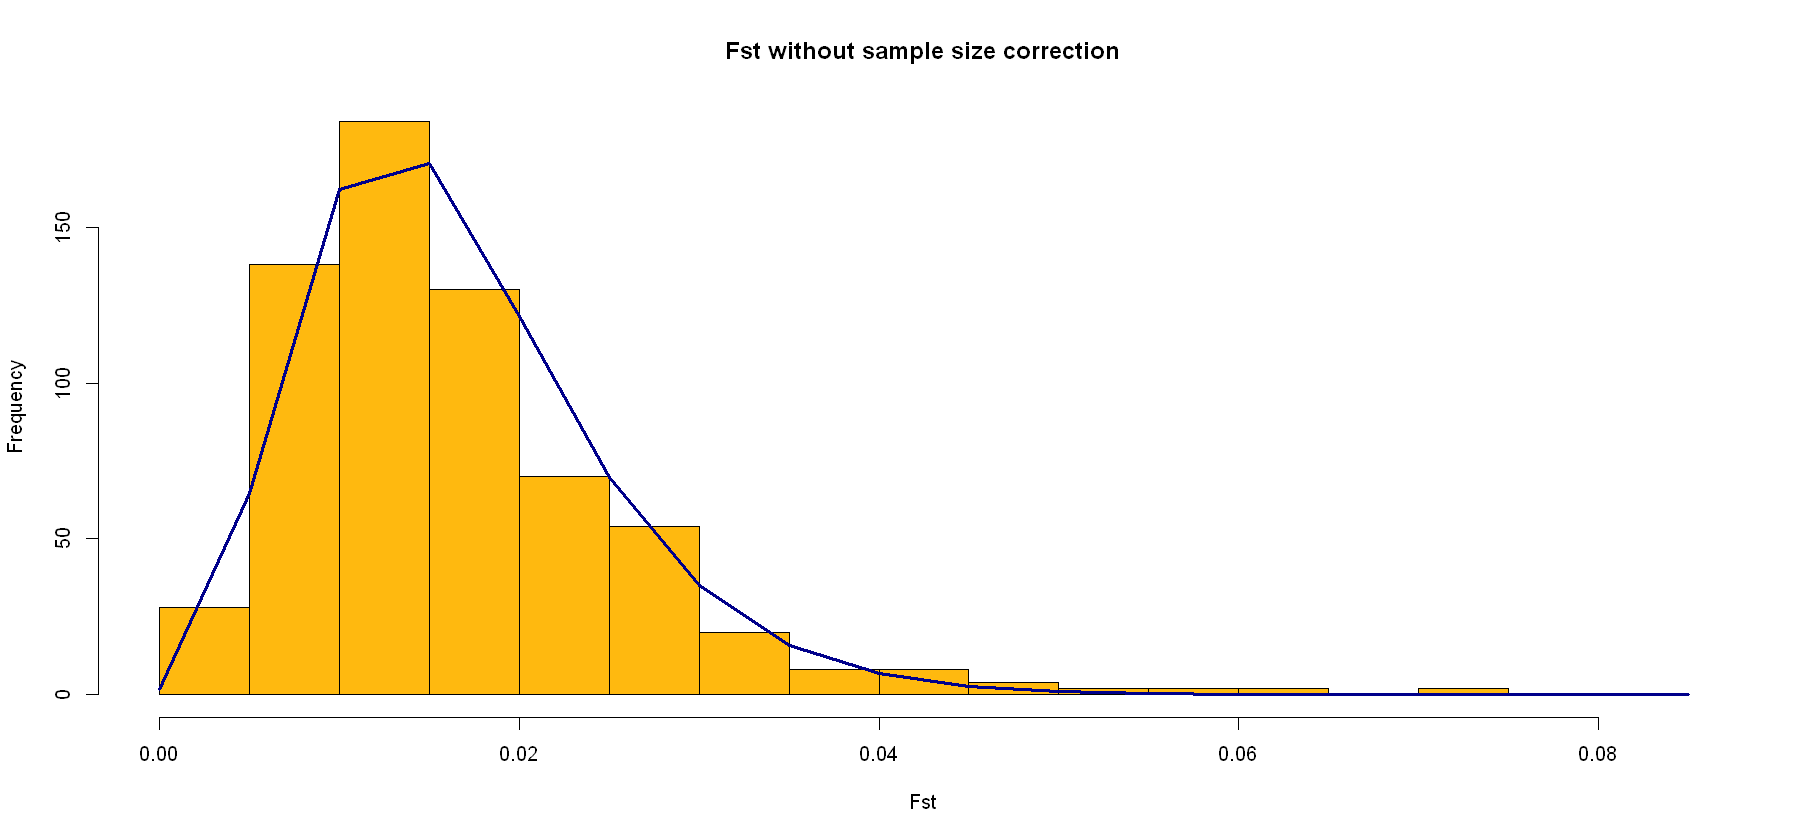

In [4]:
options(repr.plot.width=15, repr.plot.height=7)
full_outflnk <- gl.outflank(
    full_dataset, 
    Hmin= 0.01, 
    qthreshold = 0.05, 
    LeftTrimFraction = 0.05,
    RightTrimFraction = 0.05
)

## Post processing

In [6]:
full_outflnk <- full_outflnk$outflank$results

## Remove duplicated rows for each SNP
toRemove <- seq(1, nrow(full_outflnk), by=2)
full_outflnk <- full_outflnk[-toRemove, ]
head(full_outflnk)

,LocusName,He,FST,T1,T2,FSTNoCorr,T1NoCorr,T2NoCorr,meanAlleleFreq,indexOrder,GoodH,qvalues,pvalues,pvaluesRightTail,OutlierFlag
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<lgl>
2,232_pilon_2036.002,0.04054424,0.003180230,6.459596e-05,0.02031173,0.01736719,0.0003528371,0.02031630,0.9792994,2,goodH,0.9586838,0.73900787,0.36950393,FALSE
4,335_pilon_972.003,0.03310320,0.015963394,2.652729e-04,0.01661757,0.03380378,0.0005619118,0.01662275,0.9831650,4,goodH,0.4532977,0.05496064,0.02748032,FALSE
6,341_pilon_1400.004,0.07372778,0.012276337,4.540888e-04,0.03698895,0.02929569,0.0010838729,0.03699769,0.9616667,6,goodH,0.6527612,0.12220885,0.06110443,FALSE
8,536_pilon_3491.002,0.02571911,0.002899539,3.736002e-05,0.01288482,0.01751713,0.0002257530,0.01288756,0.9869707,8,goodH,0.9586838,0.72530940,0.36265470,FALSE
10,794_pilon_11572.001,0.03736961,-0.001459879,-2.731522e-05,0.01871061,0.01285216,0.0002405307,0.01871519,0.9809524,10,goodH,0.9586838,0.78509413,0.60745294,FALSE
12,1009_pilon_1199.004,0.02476391,-0.001584578,-1.965463e-05,0.01240370,0.01625181,0.0002016387,0.01240716,0.9874608,12,goodH,0.9586838,0.84589219,0.42294609,FALSE


Find which markers are putative outliers

In [7]:
out_index <- which(full_outflnk$OutlierFlag==TRUE)
outflank_names <- locNames(full_dataset)[out_index]
length(outflank_names)
head(outflank_names)

[1] 39

[1] "22845_pilon_21316"  "38948_pilon_27399"  "41950_pilon_50866" 
[4] "43953_pilon_6455"   "49150_pilon_108095" "55180_pilon_1698"

In [8]:
write.csv(full_outflnk, file = "outflank.thinned.csv", row.names = FALSE)
write.table(outflank_names, file = "outflank.outliers.loci", row.names = F, col.names = F, quote = F)

## Plots

In [7]:
mycolors <- c("#bbbbbb", "#4095b5", "#8a556e", "#f4cf30")

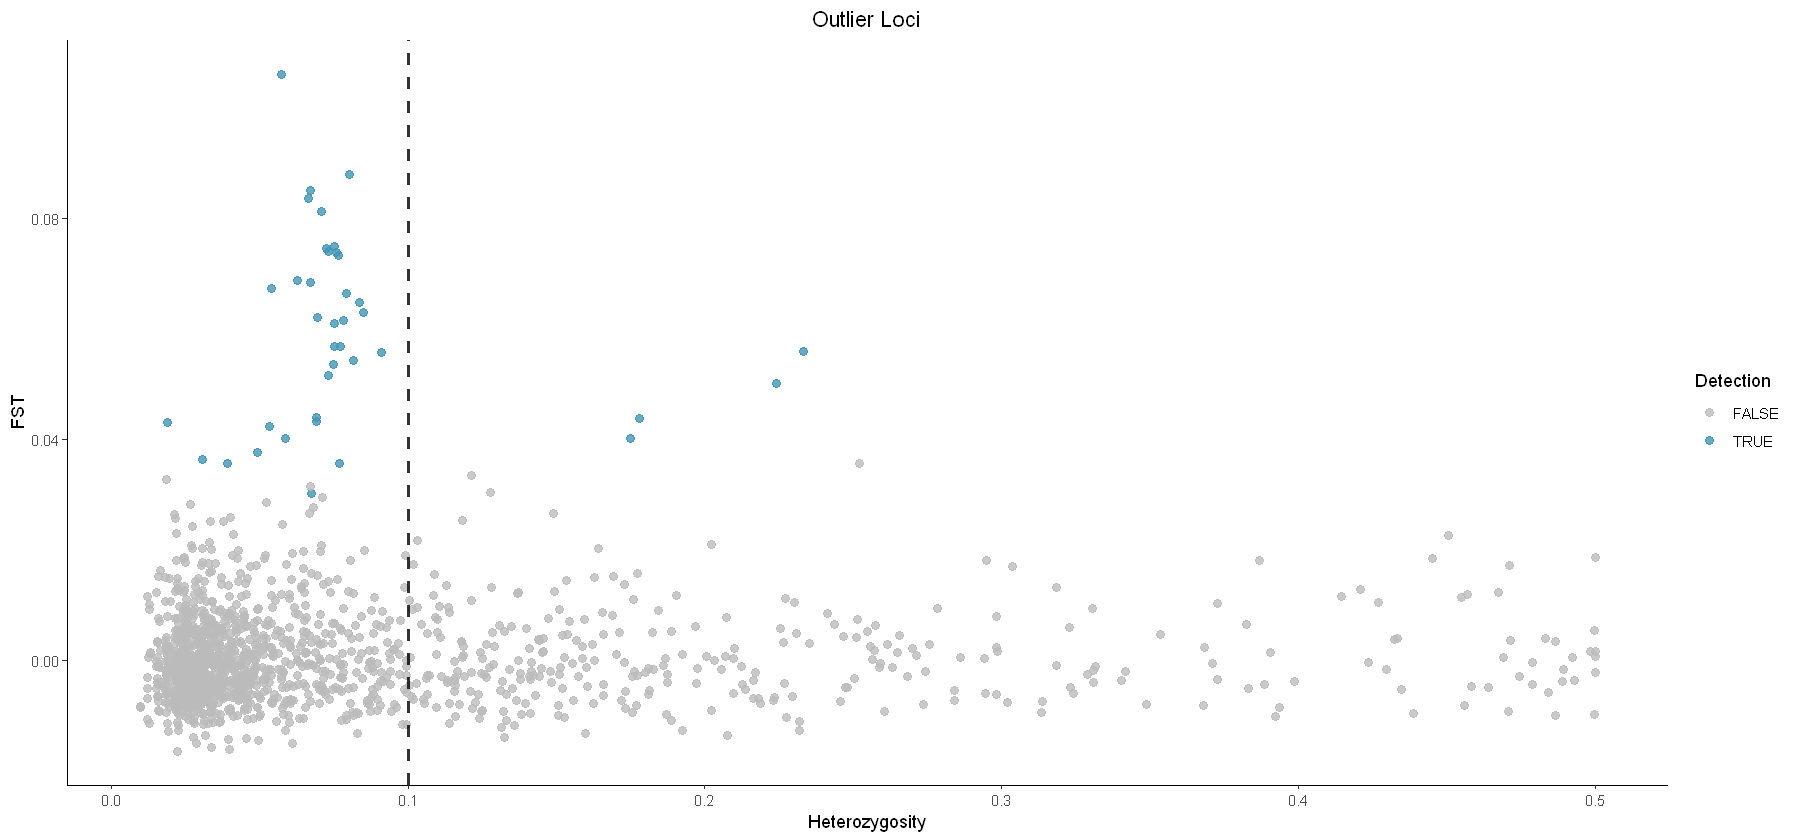

In [8]:
options(repr.plot.width=15, repr.plot.height=7)
ggplot(data = full_outflnk, x = He, y = FST) + 
  theme_classic() +
  geom_point(aes(x = He, y = FST, col = OutlierFlag), alpha = 0.8,  size = 2.1) + 
  geom_vline(xintercept = 0.1, alpha = 0.8, linetype = "dashed", size = 1) +
  labs(x = "Heterozygosity", y = "FST", color = "Detection") +
  scale_color_manual(values = mycolors[1:2]) +
  ggtitle("Outlier Loci") +
  theme(plot.title = element_text(hjust = 0.5))